<h1>Black Friday Sales EDA </h1>



About this Dataset
Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [43]:
# Ensure system is above 3.5 
import sys
assert sys.version_info >= (3, 5)

In [44]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [45]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [46]:
# Import for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [47]:
# Download the Friday sale EDA dataset from Kaggle

df = pd.read_csv("/Users/kevinc/Desktop/F21DL Data Mining Machine Learning/BlackFridaySale.csv")


In [48]:
# Display the basic informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Only "Product_Category_2" and "Product_Category_3" has empty/null value, all other columns is full

In [49]:
df.isnull().sum()   # display the total number of null value in each columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<h1>Clean up the dataset for processing </h2>

In [50]:
df=df.fillna(0) #fill all null value with 0
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [51]:
df['Gender']=df['Gender'].map({'M':1,'F':0})  # covert the gender to categorical for processing

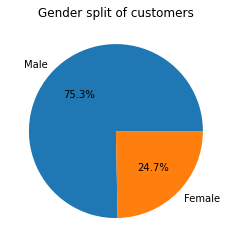

In [52]:
#how the Gender split of the customer
labels=['Male','Female']
plt.pie(df.Gender.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Gender split of customers')
plt.show()

In [53]:
df['Age'].value_counts().index   #show all age range of customer

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

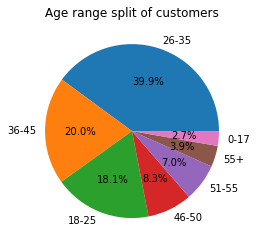

In [54]:
labels=df['Age'].value_counts().index
plt.pie(df.Age.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Age range split of customers')
plt.show()

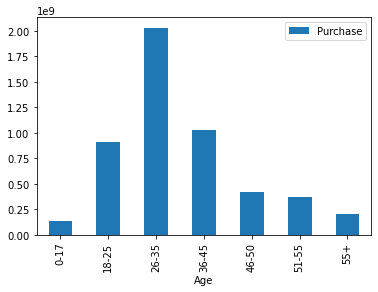

In [55]:
#create a graph with age and total purchase of each age group

df.groupby('Age')['Purchase'].sum().plot(kind='bar')
plt.legend()

In [56]:
#Covert Age into categorical data
df['Age']=df['Age'].map({'26-35':2, '36-45':3, '18-25':1, '46-50':4, '51-55':5, '55+':6, '0-17':0})   #way to automatic this?


In [57]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,0.0,0.0,7969


In [62]:
#show total number of unique user and which user has the most transactions
df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [58]:
#show the total number of unquie product bought by coustomer
df["Product_ID"].nunique()

3631

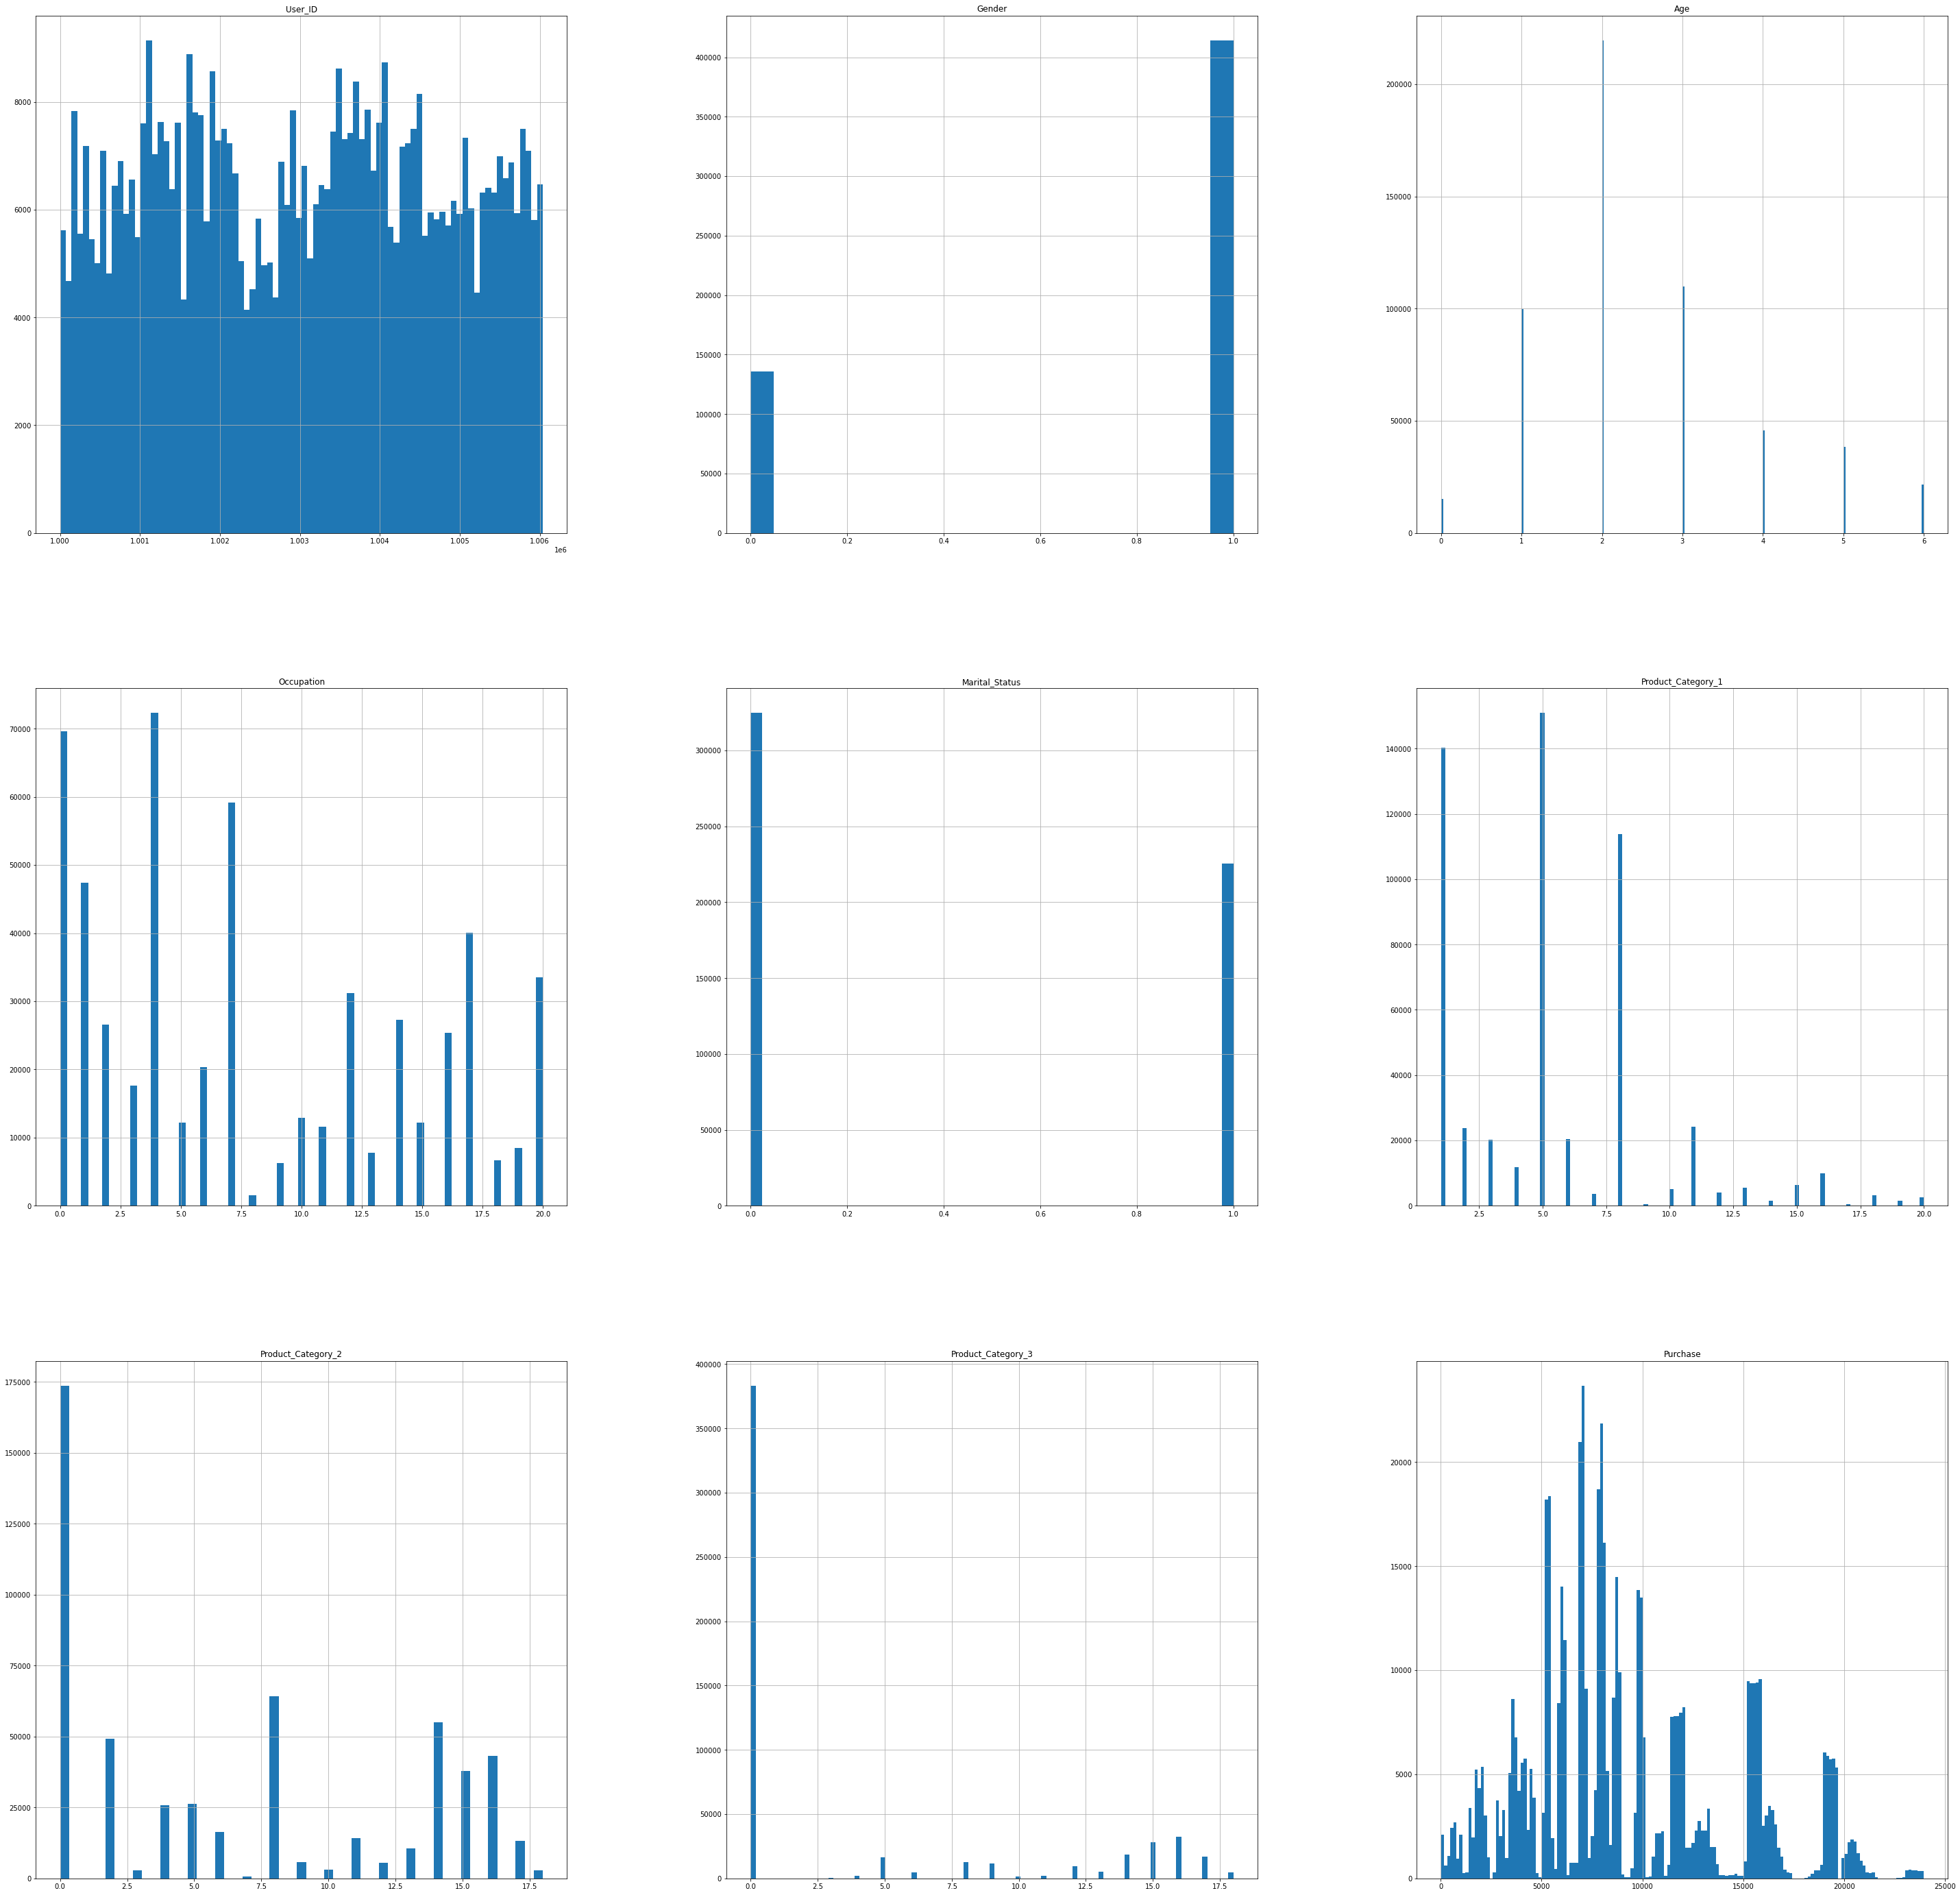

In [64]:
%matplotlib inline
df.hist(bins='auto', figsize=(50,50))
plt.show()

In [67]:
#how what is the highest relations to purchase 
corr_matrix=df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)  

Purchase              1.000000
Product_Category_3    0.288501
Gender                0.060346
Product_Category_2    0.052288
Occupation            0.020833
Age                   0.015839
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

array([[<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Age', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Gender', ylabel='Purchase'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>]], dtype=object)

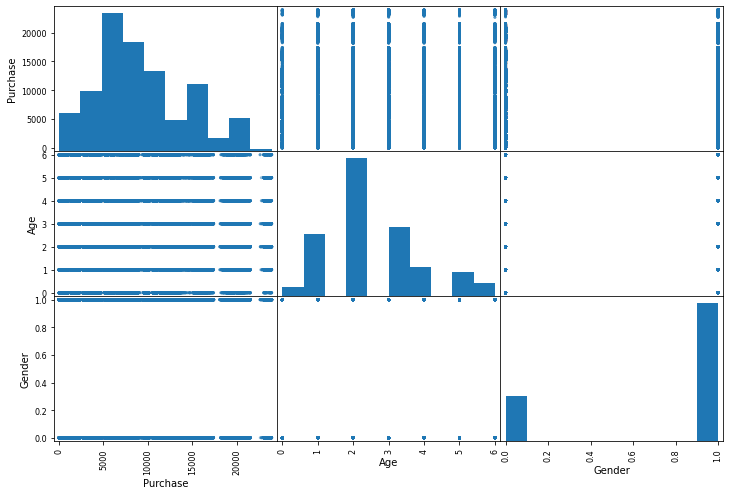

In [74]:

from pandas.plotting import scatter_matrix

Attributes=['Purchase','Age','Gender']
scatter_matrix(df[Attributes],figsize=(12,8))